In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def IntFunc(y, t, c):
  x0, y0, theta0, phi0 = y
  dphidt = c*np.sin(t)
  dthetadt = np.tan(phi0)
  dxdt = np.cos(theta0)
  dydt = np.sin(theta0)
  return [dxdt, dydt, dthetadt, dphidt]

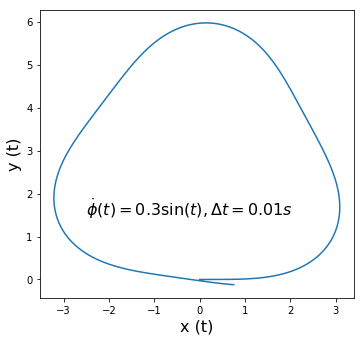

In [3]:
fig = plt.figure(figsize=(5.6, 5))
plt.subplots_adjust(left = 0.2, bottom = 0.15, right = 0.98, top = 0.95)
ratio=0.3
timestep = 0.01
ninterval = int(20/timestep)+1
t = np.linspace(0,20,ninterval)
 # xs, ys, thetas, phis = 
result = odeint(IntFunc,[0,0,0,0],t, args=(ratio,))
plt.plot(result.T[0], result.T[1])
plt.xlabel('x (t)', fontsize=16)
plt.ylabel('y (t)', fontsize=16)
plt.text(-2.5, 1.5, r'$\dot{\phi}(t)=%s \sin(t),\Delta t=%s s$'%(ratio,timestep), fontsize=16)
#plt.savefig('xy%s.png' %ratio)
plt.show()

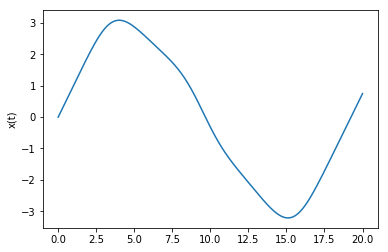

In [6]:
plt.plot(t,result.T[0])
plt.ylabel('x(t)')
plt.show()

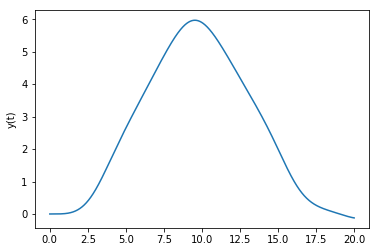

In [7]:
plt.plot(t,result.T[1])
plt.ylabel('y(t)')
plt.show()

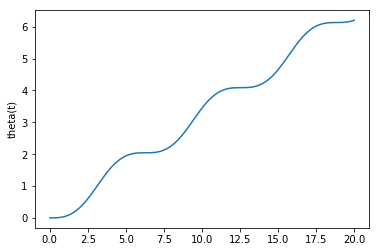

In [8]:
plt.plot(t,result.T[2])
plt.ylabel('theta(t)')
plt.show()

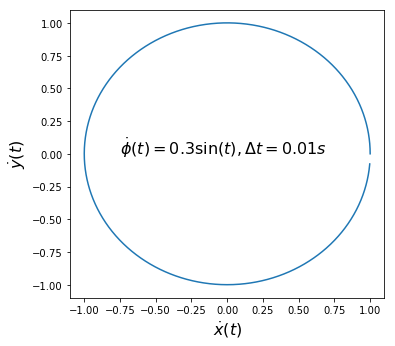

In [27]:
fig = plt.figure(figsize=(5.6, 5))
plt.subplots_adjust(left = 0.2, bottom = 0.15, right = 0.98, top = 0.95)
plt.plot(np.cos(result.T[2]), np.sin(result.T[2]))
#plt.margins(x=0.1, y=0.1) 
plt.xlabel(r'$\dot{x} (t)$', fontsize=16)
plt.ylabel(r'$\dot{y} (t)$', fontsize=16)
plt.text(-0.75, 0, r'$\dot{\phi}(t)=%s \sin(t),\Delta t=%s s$'%(ratio,timestep), fontsize=16)
plt.savefig('v.png')
plt.show()

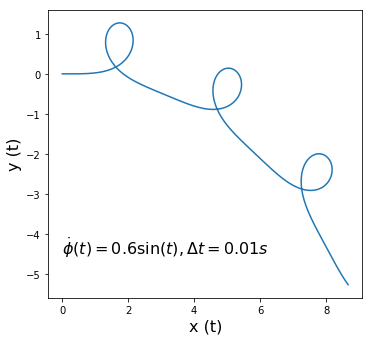

In [10]:
fig = plt.figure(figsize=(5.6, 5))
plt.subplots_adjust(left = 0.2, bottom = 0.15, right = 0.98, top = 0.95)
ratio=0.6
timestep = 0.01
ninterval = int(20/timestep)+1
t = np.linspace(0,20,ninterval)
 # xs, ys, thetas, phis = 
result = odeint(IntFunc,[0,0,0,0],t, args=(ratio,))
plt.plot(result.T[0], result.T[1])
plt.xlabel('x (t)', fontsize=16)
plt.ylabel('y (t)', fontsize=16)
plt.text(0, -4.5, r'$\dot{\phi}(t)=%s \sin(t),\Delta t=%s s$'%(ratio,timestep), fontsize=16)
#plt.savefig('xy%s.png' %ratio)
plt.show()

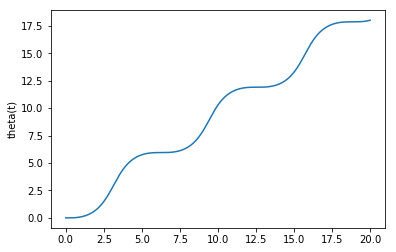

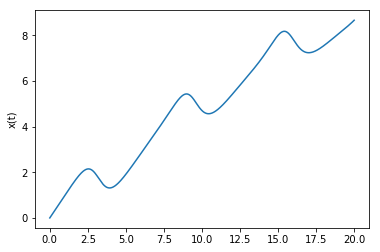

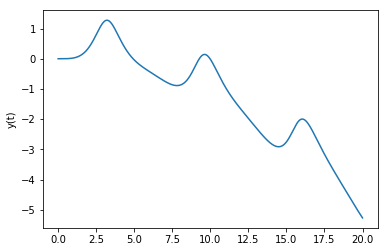

In [11]:
plt.plot(t,result.T[2])
plt.ylabel('theta(t)')
plt.show()
plt.plot(t,result.T[0])
plt.ylabel('x(t)')
plt.show()
plt.plot(t,result.T[1])
plt.ylabel('y(t)')
plt.show()

/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


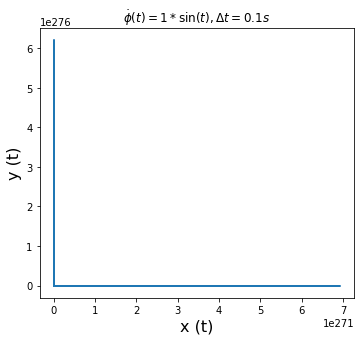

In [3]:
ax = plt.figure(figsize=(5.6, 5))
plt.subplots_adjust(left = 0.2, bottom = 0.15, right = 0.98, top = 0.9)
ratio=1
timestep = 0.1
ninterval = int(20/timestep)+1
t = np.linspace(0,20,ninterval)
 # xs, ys, thetas, phis = 
result = odeint(IntFunc,[0,0,0,0],t, args=(ratio,))
plt.plot(result.T[0], result.T[1])
plt.xlabel('x (t)', fontsize=16)
plt.ylabel('y (t)', fontsize=16)
plt.title(r'$\dot{\phi}(t)=%s * \sin(t),\Delta t=%s s$'%(ratio,timestep))
#plt.text(0.1,0.1, r'$\dot{\phi}(t)=\sin(t),\Delta t=%s s$'%timestep, fontsize=16,horizontalalignment='center',
#...      verticalalignment='center',transform=ax.transAxes)
#plt.legend('$\dot{\phi}(t)=\sin(t),\Delta t=%s s$'%timestep, fontsize=16)
#plt.savefig('xy%s.png' %ratio)
plt.show()

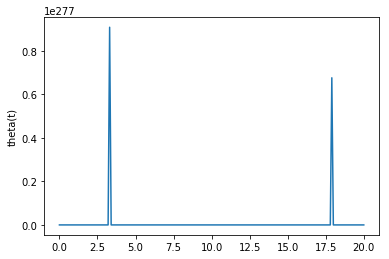

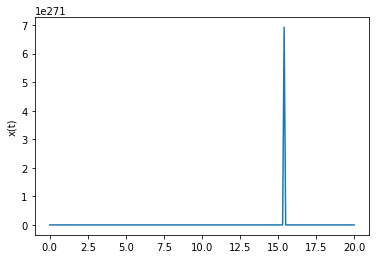

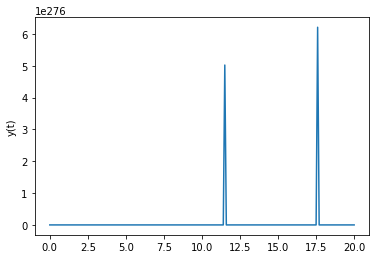

In [4]:
plt.plot(t,result.T[2])
plt.ylabel('theta(t)')
plt.show()
plt.plot(t,result.T[0])
plt.ylabel('x(t)')
plt.show()
plt.plot(t,result.T[1])
plt.ylabel('y(t)')
plt.show()

In [0]:
def Q2(ratio, timestep, flag = False):
  def dphidt(y,t,c):
      dydt = c*np.sin(t)
      return dydt

  def dthetadt(y, t, phi):
      dydt = np.tan(phi)
      return dydt

  def dxdt(x, t, theta):
    dxdt = np.cos(theta)
    return dxdt

  def dydt(y, t, theta):
    dydt = np.sin(theta)
    return dydt

  # initial condition
  theta, phi = 0, 0
  z0 = [0, 0]
  thetas =[0]
  x,y= [0],[0]

  # time points
  ninterval = int(20/timestep)+1
  t = np.linspace(0,20,ninterval)
  phis = odeint(dphidt,phi,t,args=(ratio,))

  #x[i] = \int dx[i-1] from dt=[i-1,i]
  for i in range(1, ninterval):
    x.append(odeint(dxdt, x[i-1], [i-1, i], args = (thetas[i-1],))[-1])
    y.append(odeint(dydt, y[i-1], [i-1, i], args = (thetas[i-1],))[-1])
    theta = (odeint(dthetadt, theta, [i-1, i], args = (phis[i-1],)))[-1]
    thetas.append(theta)


  plt.plot(x, y)
  plt.xlabel('x (t)', fontsize=16)
  plt.ylabel('y (t)', fontsize=16)
  plt.text(0.2, 0.5, r'$\dot{\phi}(t)=%s \sin(t),\Delta t=%s s$'%(ratio,timestep), fontsize=16)
  #plt.savefig('xy%s.png' %ratio)
  plt.show()
  
  if flag:
#     xdot = []
#     ydot = []
#     v = []
#     for i in thetas:
#       xdot.append(np.cos(i))
#       ydot.append(np.sin(i))
#       v.append(np.cos(i)**2+np.sin(i)**2)
#     plt.plot(xdot, ydot)
    #plt.show()
    return thetas

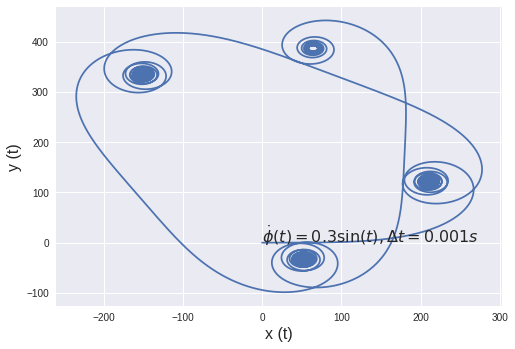

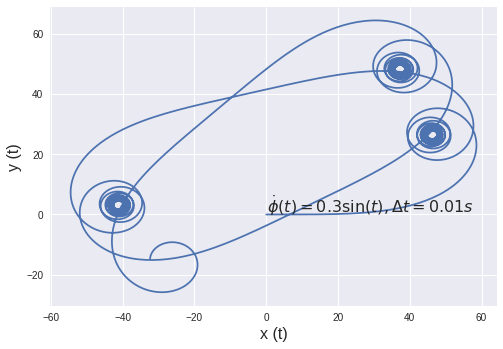

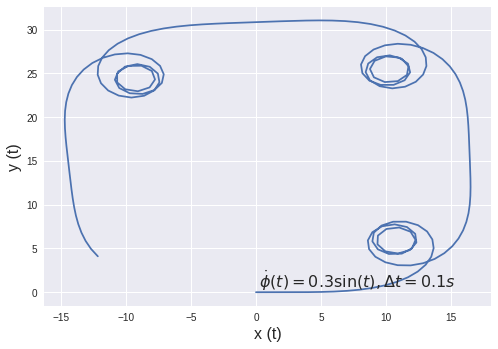

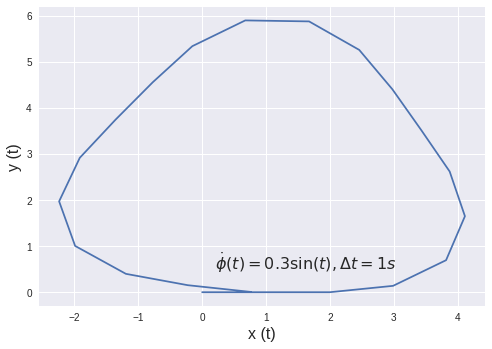

In [0]:
for i in [0.001, 0.01, 0.1, 1]:
#for i in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
  Q2(0.3, i)

## Explain the plot:
v is constant, so the line length remain constant per time interval. The phi dot is steering rate, which changes as sin(t). we know from the sin function, that the initial 

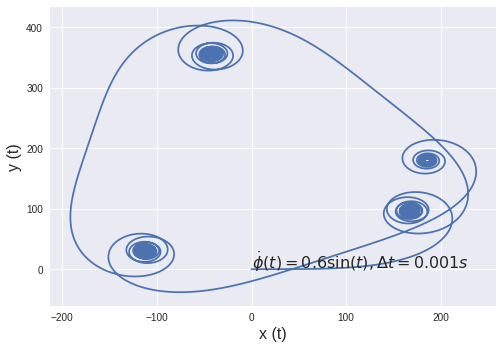

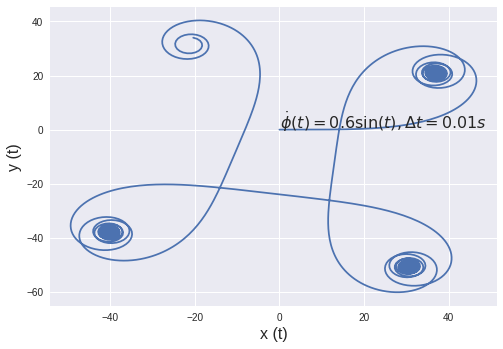

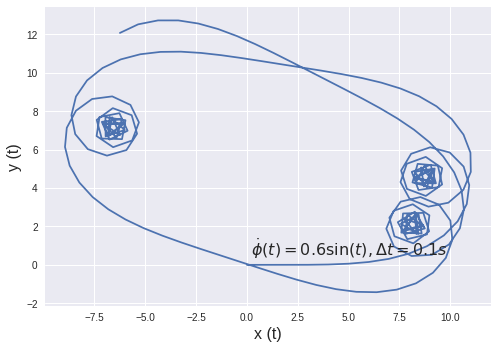

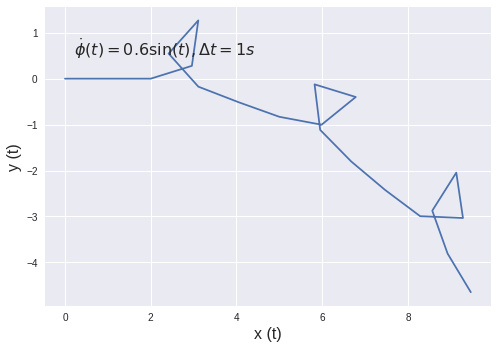

In [0]:
for i in [0.001, 0.01, 0.1, 1]:
#for i in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
  Q2(0.6, i)

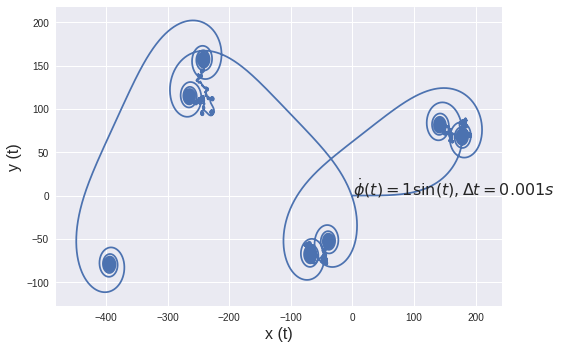

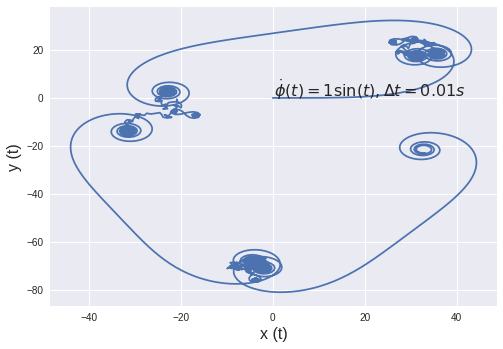

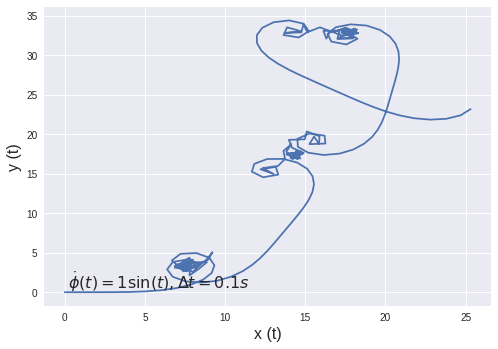

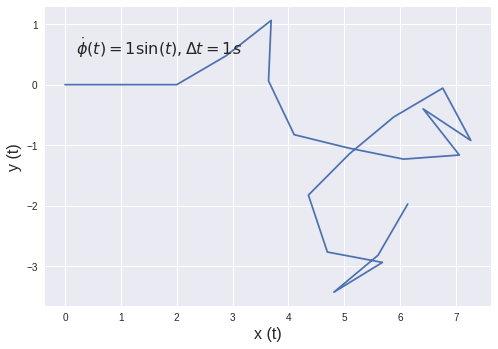

In [0]:
for i in [0.001, 0.01, 0.1, 1]:
#for i in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]:
  Q2(1, i)

In [0]:
a

[0,
 array([0.]),
 array([0.13879027]),
 array([0.59118545]),
 array([1.27092376]),
 array([1.81216404]),
 array([2.03043582]),
 array([2.04238523]),
 array([2.11634893]),
 array([2.47419781]),
 array([3.1198873]),
 array([3.73536347]),
 array([4.04324549]),
 array([4.09012359]),
 array([4.11789662]),
 array([4.38282496]),
 array([4.96593299]),
 array([5.63158213]),
 array([6.03395349]),
 array([6.13621265]),
 array([6.1396012])]

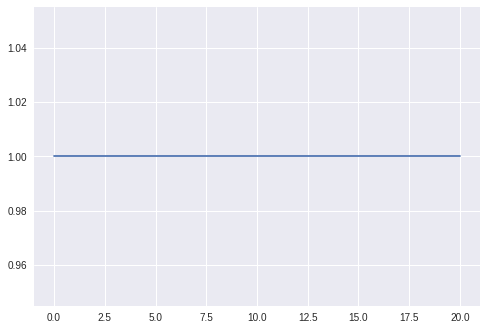

In [0]:
v=[]
for i in thetas:
  tmp = np.sqrt(np.cos(i)**2+np.sin(i)**2)
  v.append(tmp)
plt.plot(np.linspace(0,20,21), v)
plt.show()

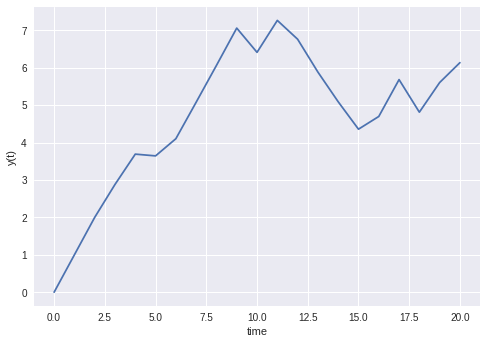

In [0]:
def dphidt(y,t):
    dydt = np.sin(t)
    return dydt
  
def dthetadt(y, t, phi):
    dydt = np.tan(phi)
    return dydt

def dxdt(x, t, theta):
  dxdt = np.cos(theta)
  return dxdt

def dydt(y, t, theta):
  dydt = np.sin(theta)
  return dydt
  
# initial condition
theta, phi = 0, 0
z0 = [0, 0]
thetas =[0]
x,y= [0],[0]

# time points
t = np.linspace(0,20,21)
phis = odeint(dphidt,phi,t)

for i in range(1, 21):
  x.append(odeint(dxdt, x[i-1], [i-1, i], args = (thetas[i-1],))[-1])
  y.append(odeint(dydt, y[i-1], [i-1, i], args = (thetas[i-1],))[-1])
  theta = (odeint(dthetadt, theta, [i-1, i], args = (phis[i-1],)))[-1]
  thetas.append(theta)

# solve ODE
#phi = odeint(model, 0, t)
#theta = odeint(model,theta,t)

plt.plot(t, x)
#plt.plot(t,phis)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

不同的theta/phi时间点选取！

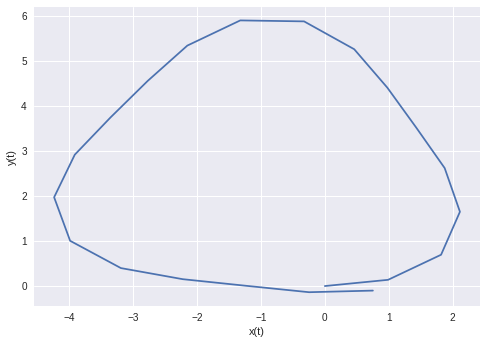

In [0]:
def dphidt(y,t):
    dydt = 0.3*np.sin(t)
    return dydt
  
def dthetadt(y, t, phi):
    dydt = np.tan(phi)
    return dydt

def dxdt(x, t, theta):
  dxdt = np.cos(theta)
  return dxdt

def dydt(y, t, theta):
  dydt = np.sin(theta)
  return dydt
  
# initial condition
theta, phi = 0, 0
x,y= [0],[0]

# time points
t = np.linspace(0,20,21)
phis = odeint(dphidt,phi,t)

for i in range(1, 21):
  theta = (odeint(dthetadt, theta, [i-1, i], args = (phis[i],)))[-1]
  thetas.append(theta)
  x.append(odeint(dxdt, x[i-1], [i-1, i], args = (theta,))[-1])
  y.append(odeint(dydt, y[i-1], [i-1, i], args = (theta,))[-1])


# solve ODE
#phi = odeint(model, 0, t)
#theta = odeint(model,theta,t)

plt.plot(x,y)
#plt.plot(t,phis)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.show()

In [0]:
plt.plot

In [0]:
odeint(dthetadt, 0, t, args = phis[])

TypeError: ignored

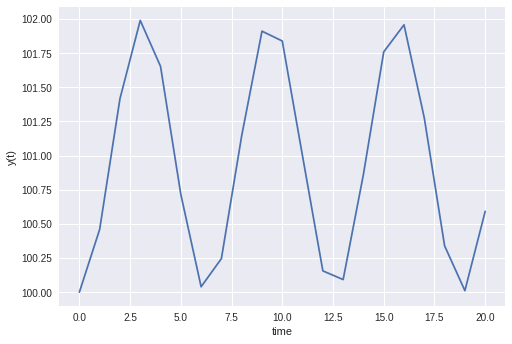

In [0]:
# plot results

ys = odeint(dphidt, 100, t)
plt.plot(t,ys)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

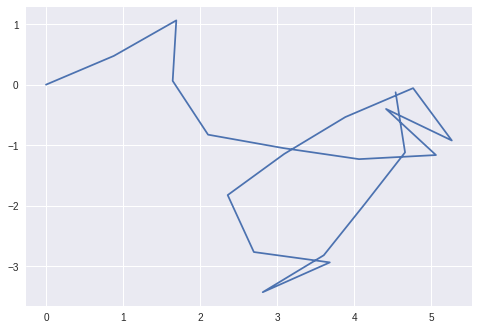

In [0]:
plt.plot(xs, ys)
plt.show()

In [0]:
xs

[0,
 array([0.8799344]),
 array([1.69002634]),
 array([1.64320528]),
 array([2.10204816]),
 array([3.07717682]),
 array([4.06036136]),
 array([5.05808116]),
 array([4.41039651]),
 array([5.26363796]),
 array([4.76147798]),
 array([3.88276977]),
 array([3.08976677]),
 array([2.35664221]),
 array([2.69610275]),
 array([3.6813095]),
 array([2.81088464]),
 array([3.60297227]),
 array([4.13487177]),
 array([4.65717301]),
 array([4.5346931])]

In [0]:
ys

[0,
 array([0.47509521]),
 array([1.06139807]),
 array([0.06249477]),
 array([-0.82602265]),
 array([-1.04766223]),
 array([-1.23027698]),
 array([-1.16278475]),
 array([-0.40087624]),
 array([-0.92239231]),
 array([-0.05761757]),
 array([-0.53497686]),
 array([-1.14419459]),
 array([-1.82428898]),
 array([-2.76490928]),
 array([-2.93627922]),
 array([-3.42858052]),
 array([-2.81817313]),
 array([-1.97136564]),
 array([-1.11860458]),
 array([-0.12613359])]

In [0]:
plt.plot()